In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bangladesh_Student_Mental_Health.csv')

In [3]:
pd.set_option('display.max_columns', 200)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1977 non-null   object
 2   3. University                                                                                               

In [5]:
df.describe()

,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?","4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?","5. In a semester, how often have you worried too much about academic affairs?","6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?","7. In a semester, how often have you felt afraid, as if something awful might happen?",Anxiety Value,"1. In a semester, how often have you felt upset due to something that happened in your academic affairs?","2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?","3. In a semester, how often you felt nervous and stressed because of academic pressure?","4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams)","5. In a semester, how often you felt confident about your ability to handle your academic / university problems?","6. In a semester, how often you felt as if things in your academic life is going on your way?","7. In a semester, how often are you able to control irritations in your academic / university affairs?","8. In a semester, how often you felt as if your academic performance was on top?","9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control?","10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?",Stress Value,"1. In a semester, how often have you had little interest or pleasure in doing things?","2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,1.770359,1.629236,1.747092,1.777441,1.859383,1.787557,1.719777,12.290845,2.341932,2.319676,2.706120,2.361153,1.824987,2.210420,2.070814,2.275670,2.419322,2.432979,22.963075,1.461305,1.787557,1.656550,1.958523,1.503794,1.781993,1.635812,1.426404,1.162367,14.374305
std,0.951704,1.028252,0.996336,0.966041,0.982362,0.993087,1.057735,5.496399,1.178599,1.154547,1.135161,1.224360,1.085291,1.099886,1.023036,1.133042,1.176564,1.164890,6.750405,0.956358,1.034030,1.060373,0.975561,1.044608,1.073946,1.029864,1.026359,1.135746,6.659329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.000

In [7]:
df.dtypes

1. Age                                                                                                                                                                   object
2. Gender                                                                                                                                                                object
3. University                                                                                                                                                            object
4. Department                                                                                                                                                            object
5. Academic Year                                                                                                                                                         object
6. Current CGPA                                                                                                         

<Axes: xlabel='1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ', ylabel='count'>

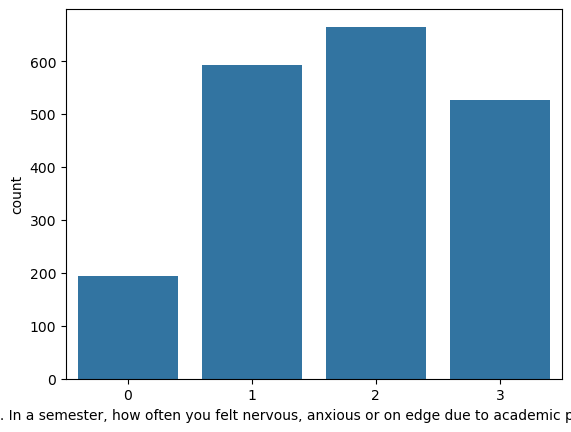

In [8]:
# long column names - use .loc for operations
# plotting distribution of students anxiety
sns.countplot(data=df, x=df.iloc[:,7])

In [9]:
# extracting GPA column (column 5)
df.iloc[:,5].unique()

array(['2.50 - 2.99', '3.80 - 4.00', '3.00 - 3.39', '3.40 - 3.79',
       'Below 2.50', 'Other'], dtype=object)

In [10]:
GPA = df.iloc[:,5].value_counts()
GPA

6. Current CGPA
3.00 - 3.39    572
3.40 - 3.79    551
2.50 - 2.99    368
3.80 - 4.00    237
Other          168
Below 2.50      81
Name: count, dtype: int64

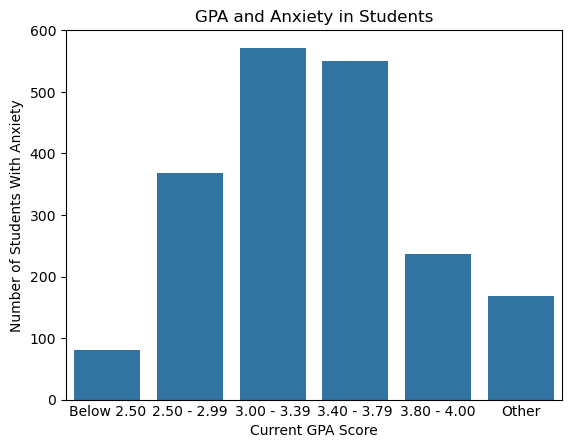

In [34]:
plt.tight_layout()
ax = sns.barplot(data = GPA, order= ['Below 2.50','2.50 - 2.99','3.00 - 3.39','3.40 - 3.79','3.80 - 4.00','Other'])
ax.set_ylabel("Number of Students With Anxiety")
ax.set_xlabel("Current GPA Score")
ax.set_title("GPA and Anxiety in Students")
ax.tick_params(axis='x', which='both', length=0)
plt.savefig("GPA and anxiety.svg", format="svg")

<Axes: xlabel='1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ', ylabel='count'>

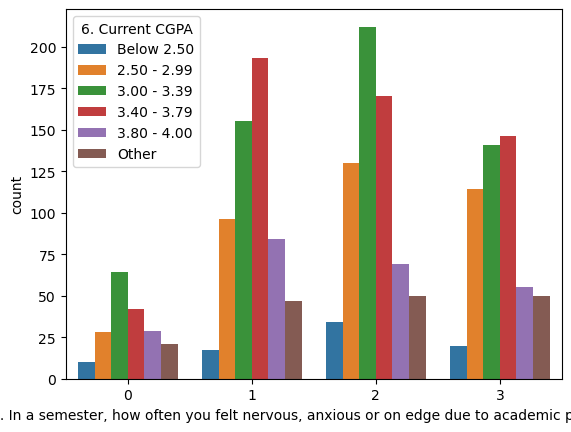

In [93]:
sns.countplot(hue=df.iloc[:,5], x=df.iloc[:,7], hue_order=['Below 2.50','2.50 - 2.99','3.00 - 3.39','3.40 - 3.79','3.80 - 4.00','Other'])
# graph seems to suggest students with higher gpa scores tend to worry more - more accurate way of saying it is: more students with higher gpa scores 
# report greater anxiety than those who do not report anxiety - this graph only shows the number of students  

In [115]:
# association between gpa and stress variables - is gpa an indicator of increased/decreased reported stress levels? use chi squared test, first make frequency table
freq_tab = pd.crosstab(df.iloc[:,5], df.iloc[:,7])

In [116]:
freq_tab

"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?",0,1,2,3
6. Current CGPA,,,,
2.50 - 2.99,28,96,130,114
3.00 - 3.39,64,155,212,141
3.40 - 3.79,42,193,170,146
3.80 - 4.00,29,84,69,55
Below 2.50,10,17,34,20
Other,21,47,50,50


In [145]:
# input freq_tab into chi square statistical test
stat, p, dof, expected = chi2_contingency(freq_tab)

In [146]:
print(p)
# p value smaller than 0.05, suggesting a relationship between GPA scores and reported anxiety levels

0.002994739891552395


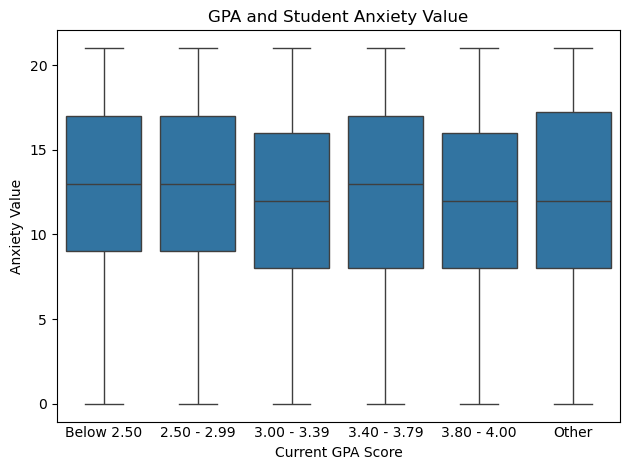

In [35]:
# now will study anxiety value variable, check for outliers
ax2 = sns.boxplot(y=df.iloc[:,14], x=df.iloc[:,5],order=['Below 2.50','2.50 - 2.99','3.00 - 3.39','3.40 - 3.79','3.80 - 4.00','Other'])
ax2.set_ylabel("Anxiety Value")
ax2.set_xlabel("Current GPA Score")
ax2.set_title("GPA and Student Anxiety Value")
ax2.tick_params(axis='x', which='both', length=0)
plt.tight_layout()
plt.savefig("GPA and anxiety box.svg", format="svg")

In [142]:
# making freq table for anxiety values to input into chi square test
freq_tab_anxval = pd.crosstab(df.iloc[:,5], df.iloc[:,14])
freq_tab_anxval

Anxiety Value,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
6. Current CGPA,,,,,,,,,,,,,,,,,,,,,,
2.50 - 2.99,11,1,7,0,8,8,9,30,14,14,23,22,23,16,38,20,17,19,30,14,13,31
3.00 - 3.39,15,6,7,4,13,16,15,53,33,39,31,30,37,41,46,27,32,23,23,23,14,44
3.40 - 3.79,11,5,4,9,9,15,23,53,27,31,18,32,34,45,38,25,26,33,28,13,20,52
3.80 - 4.00,3,3,5,5,6,10,9,16,14,17,12,12,8,12,17,15,17,7,10,12,11,16
Below 2.50,6,2,1,0,1,1,0,4,3,3,3,4,9,4,5,6,4,8,4,1,6,6
Other,8,2,3,0,3,2,6,15,9,6,12,11,9,11,7,11,7,4,11,6,8,17


In [147]:
# null hypothesis - no effect of gpa on anxiety value
# alt hypothesis - higher gpa scores associated with increased anxiety label 
stat, p, dof, expected = chi2_contingency(freq_tab_anxval)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.1150779658449637
Independent (H0 holds true)


<Axes: xlabel='Stress Value', ylabel='Count'>

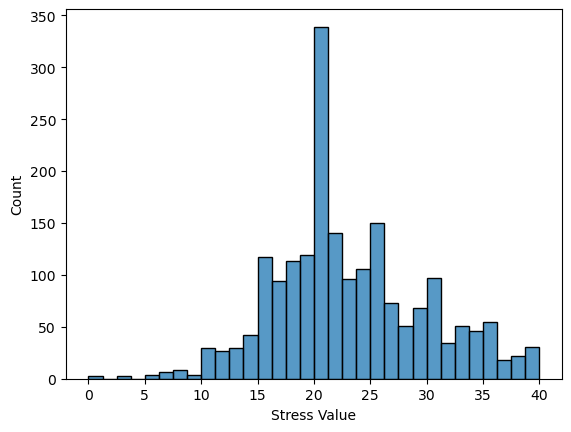

In [149]:
sns.histplot(df['Stress Value'])